In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Datasets/naukri_data.csv")

In [8]:
df.head()

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,site_name,skills,min_pay,max_pay,min_exp,max_exp,avg_exp,avg_pay
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,150000.0,225000.0,0.0,1.0,0.5,187500.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,150000.0,250000.0,0.0,0.0,0.0,200000.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bangalore,Pl/sql Developer - SQL,NaN,NaN,IT Software - Application Programming,NaN,NaN,4.0,8.0,6.0,NaN
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bangalore, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,NaN,Accounts,NaN,NaN,11.0,15.0,13.0,NaN
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bangalore,JAVA Technical Lead (6-8 yrs) -,4.0,NaN,IT Software - Application Programming,NaN,NaN,6.0,8.0,7.0,NaN


In [9]:
data=df.copy()

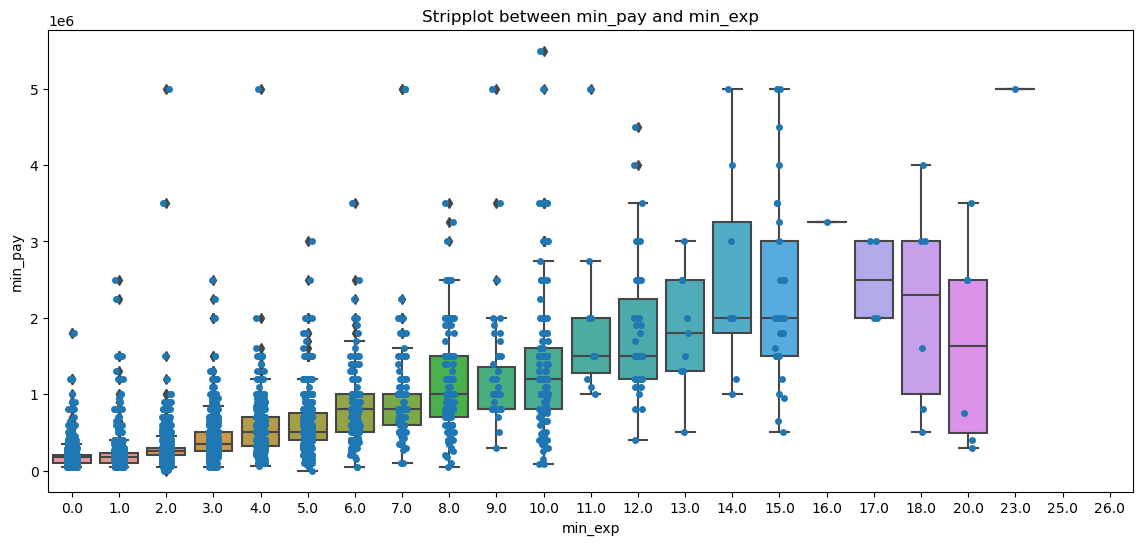

In [10]:
plt.figure(figsize=(14,6))
sns.stripplot(x='min_exp',y='min_pay',data=data)
sns.boxplot(x='min_exp',y='min_pay',data=data)
plt.title("Stripplot between min_pay and min_exp")
plt.savefig('StripplotMinPayMinExp.png', dpi=300) 

As min_exp increases min_pay also increases

Text(0.5, 1.0, 'Stripplot between max_pay and max_exp')

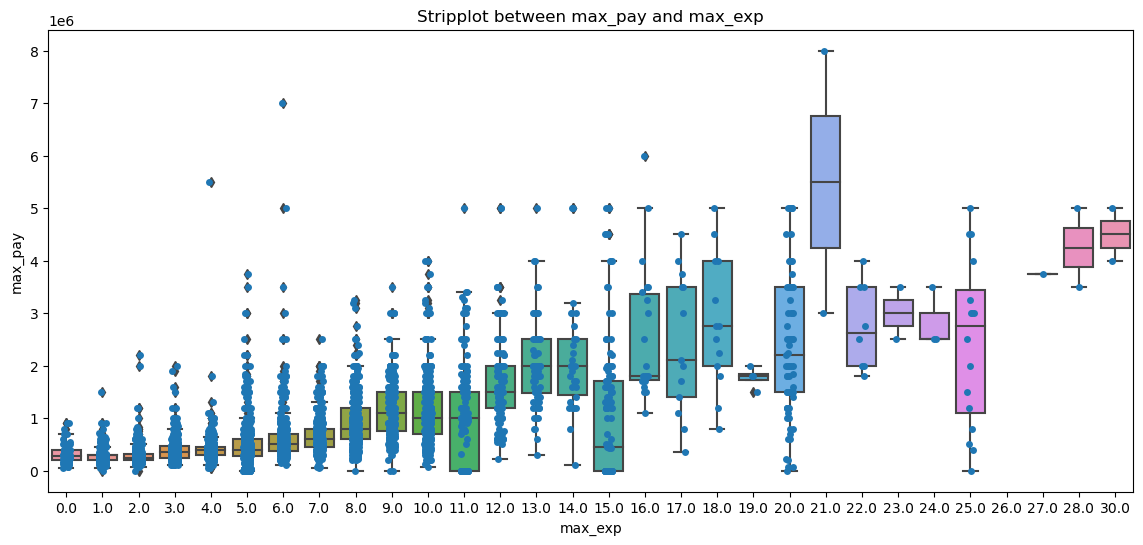

In [15]:
plt.figure(figsize=(14,6))
sns.stripplot(x='max_exp',y='max_pay',data=data)
sns.boxplot(x='max_exp',y='max_pay',data=data)
plt.title("Stripplot between max_pay and max_exp")

## Let's find out the median max_pay in different industries  and the top rated industries

<Axes: xlabel='industry'>

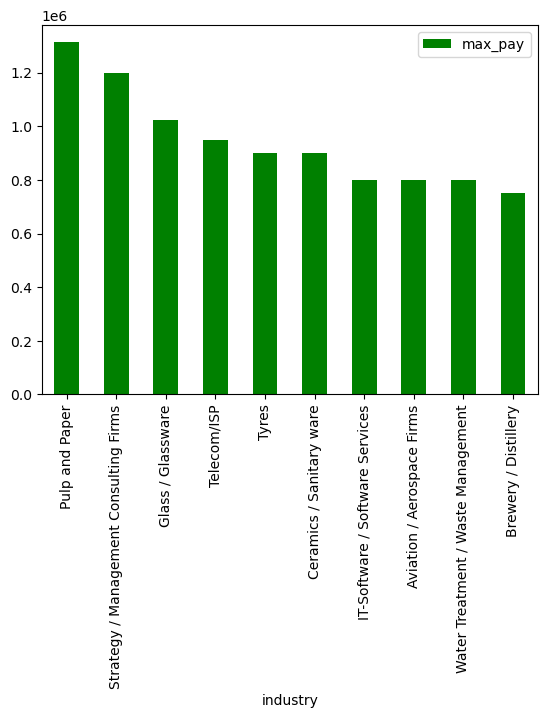

In [18]:
data[['max_pay','industry']].groupby(['industry']).median().sort_values(by='max_pay',ascending=False).head(10).plot(kind='bar',color='green')

<Axes: xlabel='industry'>

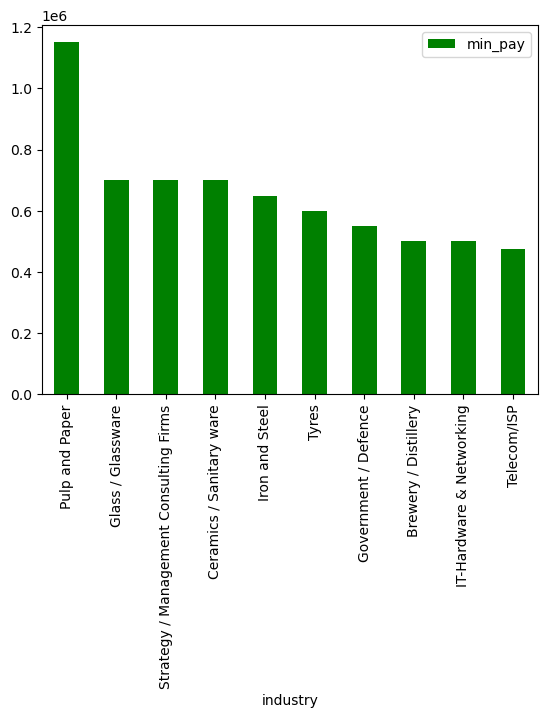

In [21]:
data[['min_pay','industry']].groupby(['industry']).median().sort_values(by='min_pay',ascending=False).head(10).plot(kind='bar',color='green')

In [23]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_exp',
       'avg_pay'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'ITES'),
  Text(1, 0, 'Marketing'),
  Text(2, 0, 'IT Software - Application Programming'),
  Text(3, 0, 'Accounts'),
  Text(4, 0, 'Production'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'IT Software - Other'),
  Text(7, 0, 'Executive Assistant'),
  Text(8, 0, 'IT Software - Mobile'),
  Text(9, 0, 'Engineering Design'),
  Text(10, 0, 'Financial Services'),
  Text(11, 0, 'Hotels'),
  Text(12, 0, 'IT Software - QA & Testing'),
  Text(13, 0, 'HR'),
  Text(14, 0, 'Supply Chain'),
  Text(15, 0, 'IT Software - Network Administration'),
  Text(16, 0, 'Architecture'),
  Text(17, 0, 'Legal'),
  Text(18, 0, 'Site Engineering'),
  Text(19, 0, 'Journalism'),
  Text(20, 0, 'IT Software - DBA'),
  Text(21, 0, 'Strategy'),
  Text(22, 0, 'Medical'),
  Text(23, 0, 'Design'),
  Text(24, 0, 'Def

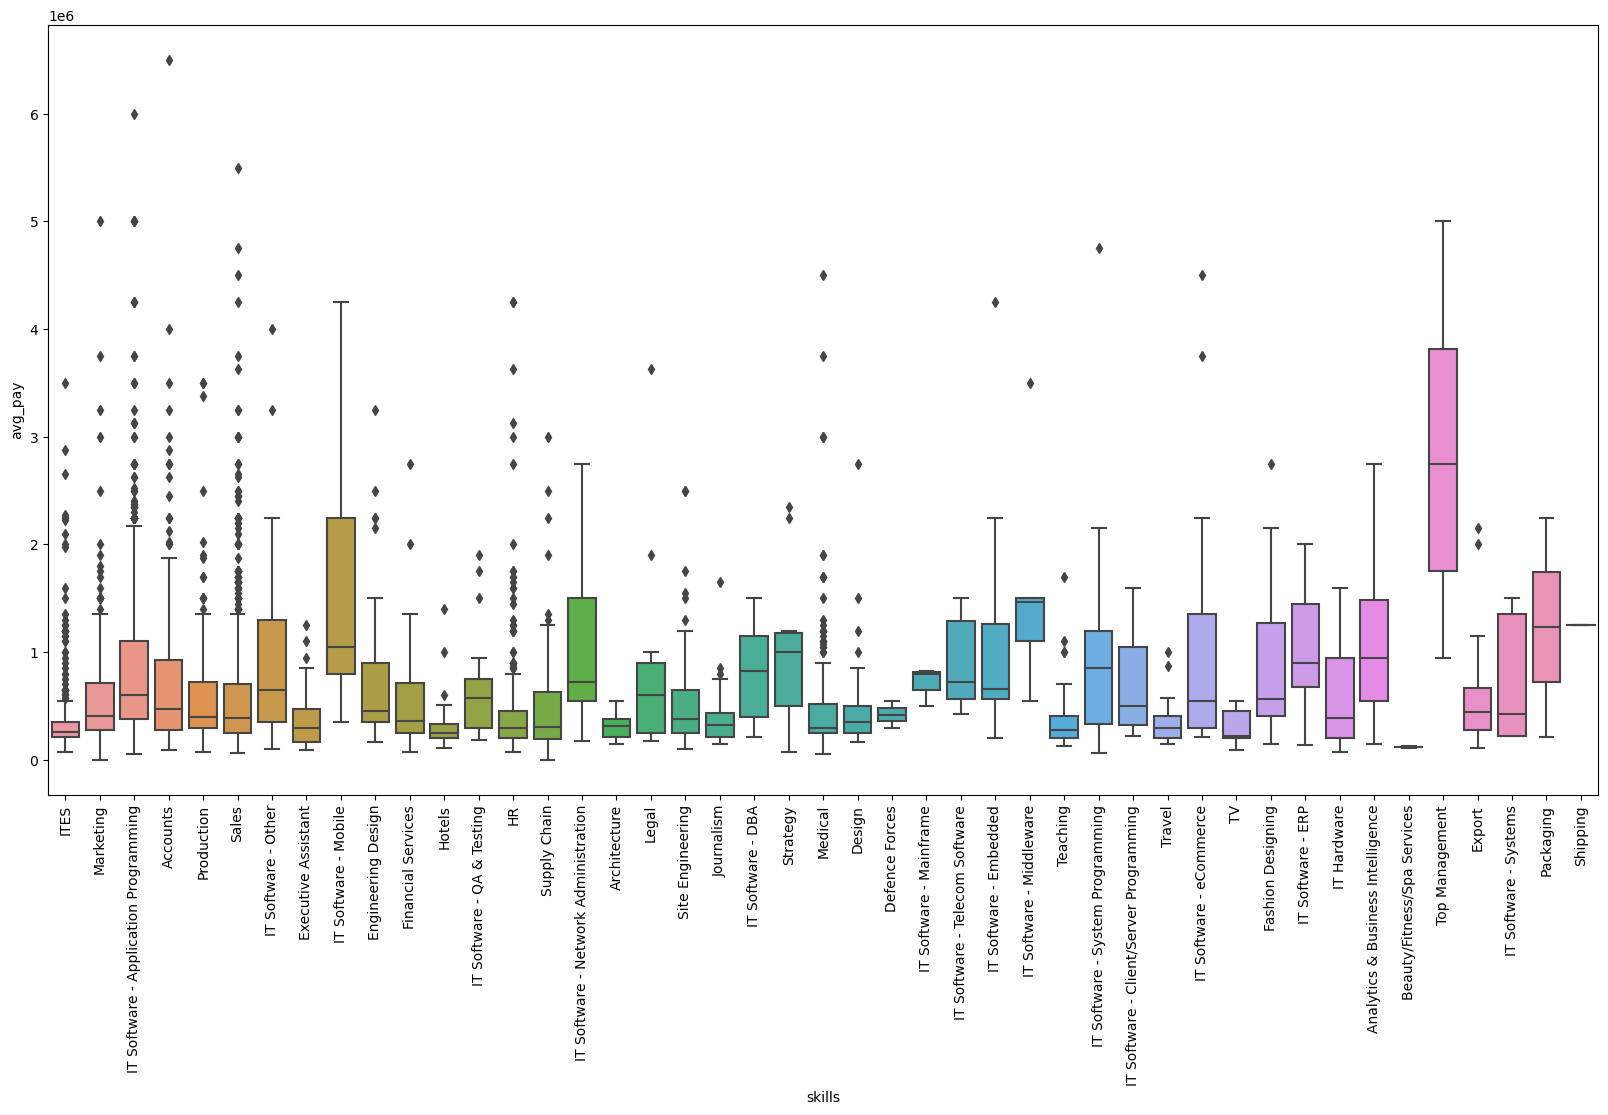

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x='skills',y='avg_pay',data=data)
plt.xticks(rotation='vertical')

In [26]:
data['skills'].nunique()

45

<Axes: xlabel='skills'>

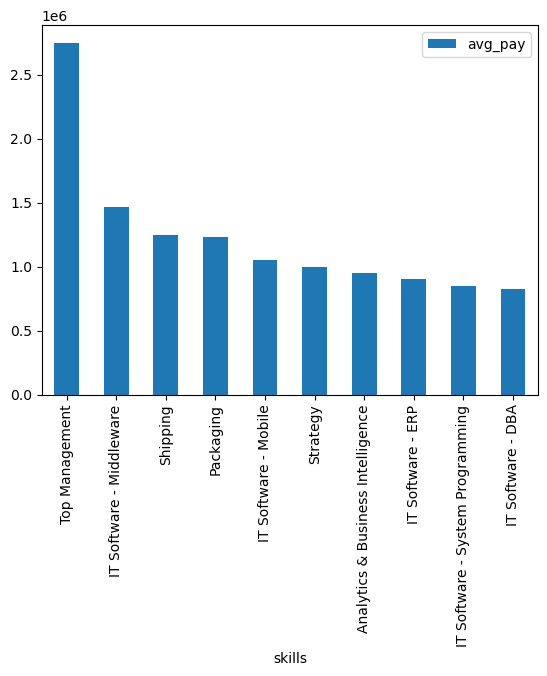

In [29]:
data[['skills','avg_pay']].groupby('skills').median().sort_values(by='avg_pay',ascending=False).head(10).plot(kind='bar')

## Analysis of the available positions in the industry

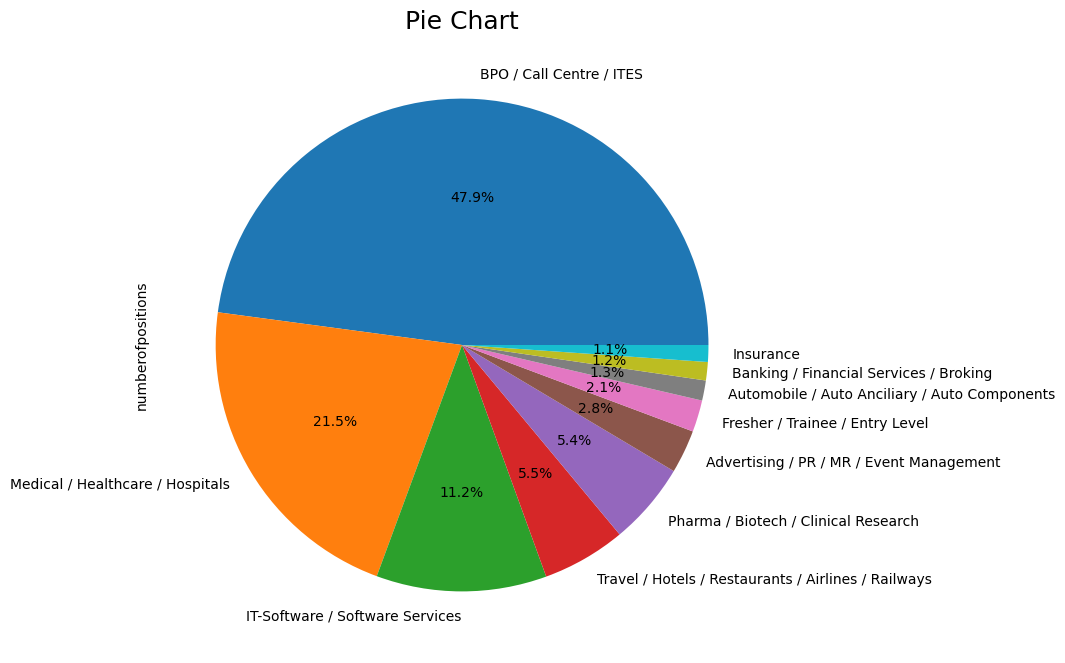

In [32]:
plt.figure(figsize=(14,8))
data.groupby('industry')['numberofpositions'].sum().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%1.1f%%')
plt.title("Pie Chart",fontsize=18)
plt.show()